# 1) Create the following data and write to a csv file: Generate 10 random points in each of the the following circles (i) centre at (3,3) and radius 2, (ii) centre at (7,7) and radius 2 (iii) centre at (11,11) and radius 2.  Plot the data as well.                     (2 marks)




            X          Y                   Circle
0    2.411757   1.669759    Center (3,3) Radius 2
1    3.465040   2.657298    Center (3,3) Radius 2
2    2.259892   2.631778    Center (3,3) Radius 2
3    1.410497   2.639846    Center (3,3) Radius 2
4    4.201735   2.827138    Center (3,3) Radius 2
5    4.389560   4.320133    Center (3,3) Radius 2
6    2.069055   3.136705    Center (3,3) Radius 2
7    2.809324   2.946669    Center (3,3) Radius 2
8    2.680554   2.025037    Center (3,3) Radius 2
9    2.272646   1.340705    Center (3,3) Radius 2
10   5.844413   5.785785    Center (7,7) Radius 2
11   7.129512   7.828781    Center (7,7) Radius 2
12   8.087771   7.105541    Center (7,7) Radius 2
13   7.018155   5.432549    Center (7,7) Radius 2
14   6.086370   7.031003    Center (7,7) Radius 2
15   7.329507   5.193544    Center (7,7) Radius 2
16   5.297181   7.241419    Center (7,7) Radius 2
17   5.782069   7.507464    Center (7,7) Radius 2
18   8.441727   7.016034    Center (7,7) Radius 2


C:\Users\Partha Sakha Paul\AppData\Local\Temp\ipykernel_7356\3932820322.py:32: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, temp_df], ignore_index=True)


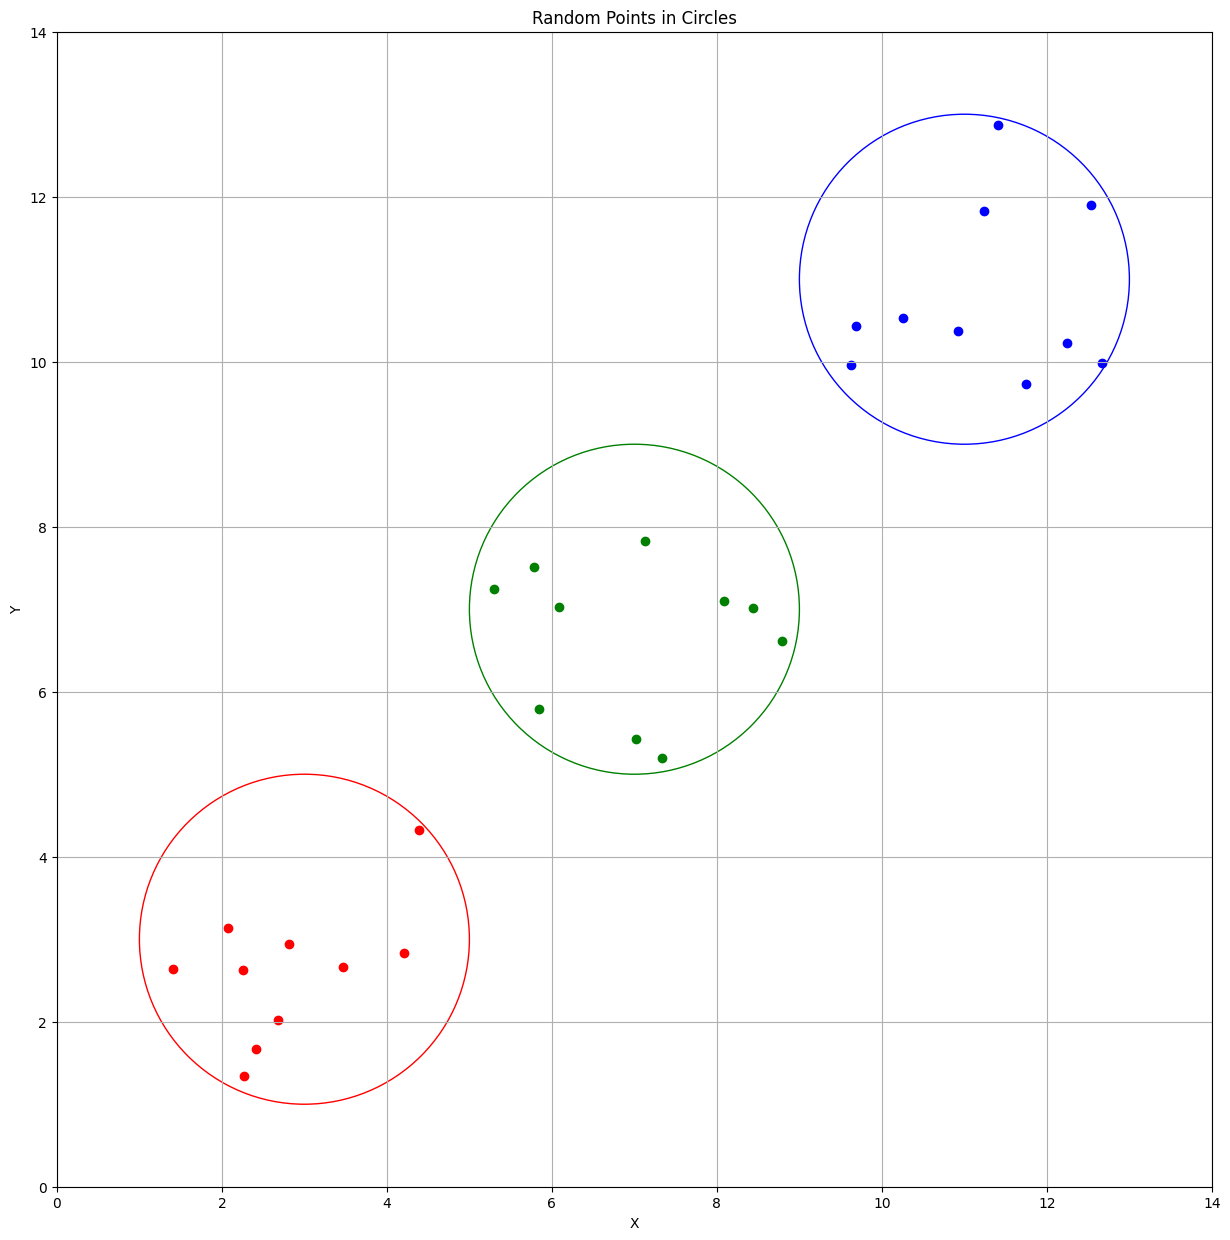

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def generate_points(cx, cy, radius, count):
    """Generate 'count'(here 10) random points within the circle centered at (cx, cy) with given radius."""
    # Generate random angles uniformly between 0 and 2*pi
    angles = np.random.uniform(0, 2 * np.pi, count)
    # Generate random radii using square root to maintain uniform density
    r = radius * np.sqrt(np.random.uniform(0, 1, count))
    # Calculate x and y coordinates using polar coordinates
    x = cx + r * np.cos(angles)
    y = cy + r * np.sin(angles)
    return x, y

# Define the parameters for the circles
centers_radii = [(3, 3, 2), (7, 7, 2), (11, 11, 2)]
total_points = 10  # Number of random points per circle

# Initialize a DataFrame to store coordinates and circle identities
df = pd.DataFrame(columns=['X', 'Y', 'Circle'])

# Loop over each circle's center and radius
for cx, cy, radius in centers_radii:
    # Generate points for the current circle
    x, y = generate_points(cx, cy, radius, total_points)
    # Label for the circle
    circle_label = f"Center ({cx},{cy}) Radius {radius}"
    # Create a temporary DataFrame to hold generated points
    temp_df = pd.DataFrame({'X': x, 'Y': y, 'Circle': [circle_label] * total_points})
    # Append the temporary DataFrame to the main DataFrame
    df = pd.concat([df, temp_df], ignore_index=True)

# Save the DataFrame to a CSV file
df.to_csv('random_circle_points.csv', index=False)
# Print the DataFrame
print(df)

# Set up plotting
plt.figure(figsize=(15, 15))
# Define colors for the different circles
colors = ['red', 'green', 'blue']

# Plot each circle with its points
for i, (cx, cy, radius) in enumerate(centers_radii):
    # Create a circle object for plotting
    circle = plt.Circle((cx, cy), radius, color=colors[i], fill=False)
    # Add the circle object to the plot
    plt.gca().add_artist(circle)
    # Subset of DataFrame for points in the current circle
    subset = df[df['Circle'] == f"Center ({cx},{cy}) Radius {radius}"]
    # Scatter plot of points for the current circle
    plt.scatter(subset['X'], subset['Y'], color=colors[i])

# Set plot properties
plt.gca().set_aspect('equal', 'box')
plt.xlim(0, 14)
plt.ylim(0, 14)
plt.title('Random Points in Circles')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
# Show the plot
plt.show()

# 2)  Implement K - means clustering algorithm and for the above data, show the change in the centroid as well as the class assignments. Also, plot the cost function for K varying from 1 to 5. Show that the value of K matches with the intuition from the data. Plot the K-classes for the final K-value.      (8 marks)


Convergence of centroids for K = 1


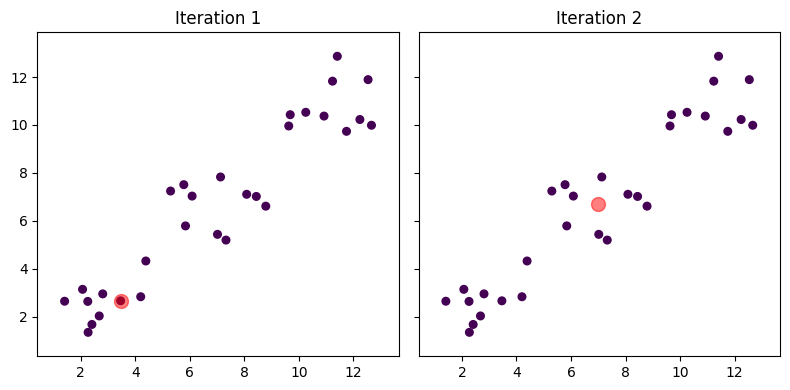

Convergence of centroids for K = 2


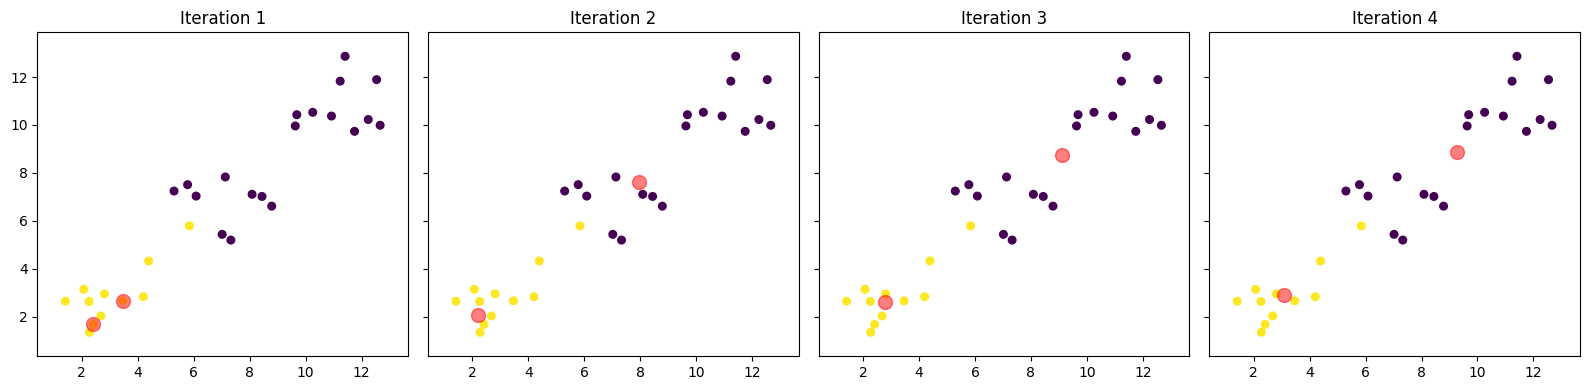

Convergence of centroids for K = 3


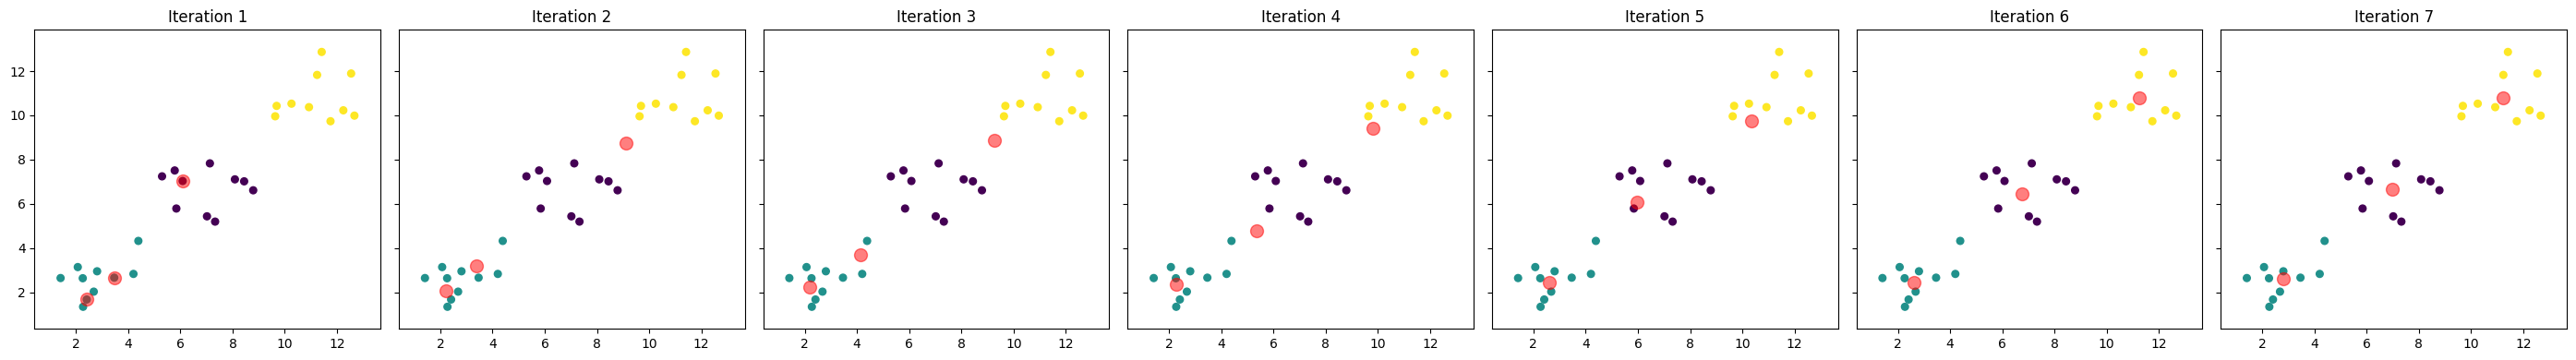

Convergence of centroids for K = 4


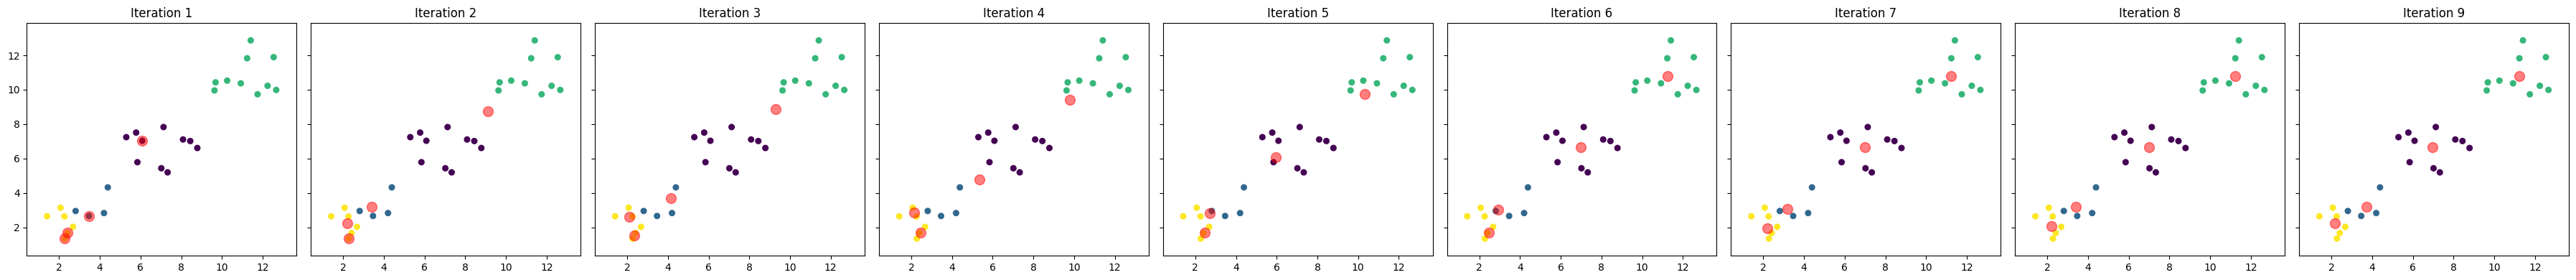

Convergence of centroids for K = 5


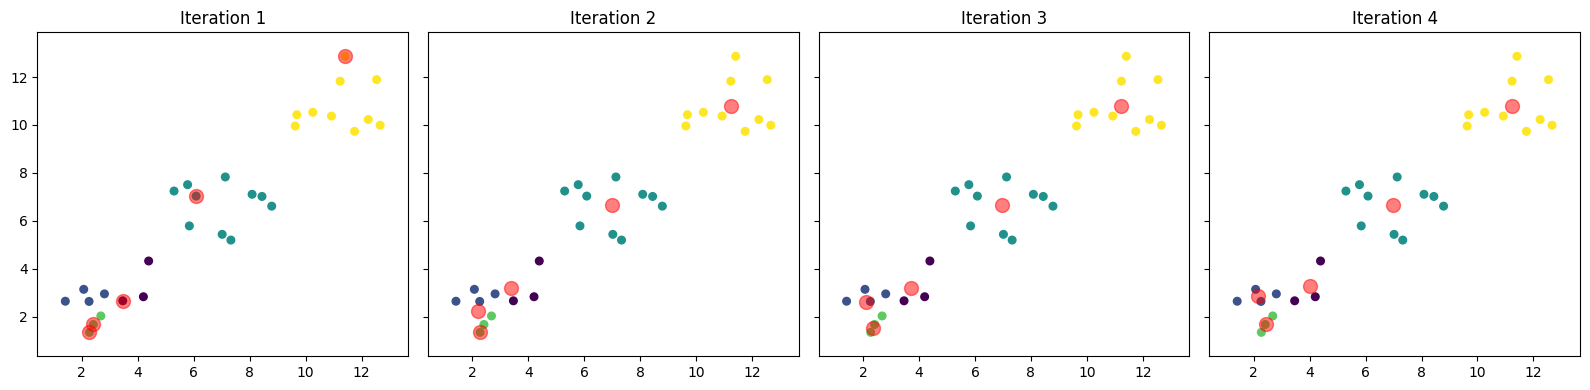

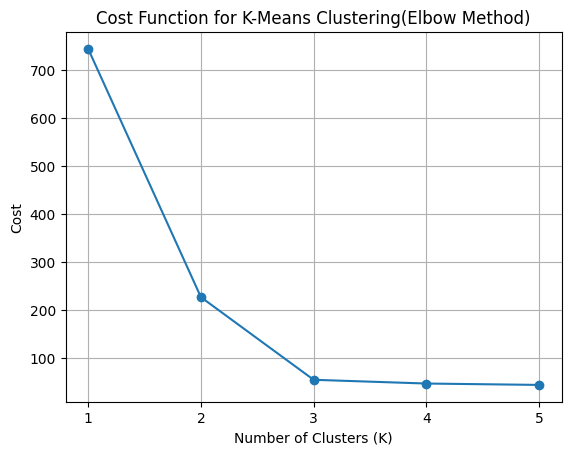

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file containing the generated circle points
df = pd.read_csv('random_circle_points.csv')

# Define the K-means clustering function using only NumPy for computation
def kmeans(X, n_clusters, rseed=2, max_iter=10):
    """Initializes centroids randomly by selecting n_clusters random points 
    from the dataset X. It also sets up a list to store the positions of centers 
    through each iteration for visualization purposes.
    """
    # Initialize the random state
    rng = np.random.RandomState(rseed)
    # Randomly select initial centroids from the dataset
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]    # To initialize the centroids with the existing points itself
    all_centers = [centers]  # List to store centers at each iteration
#     print(all_centers)

    
    """This loop iterates over the dataset to reassign points to the nearest 
    centroid and recalculates the centroids as the mean of points in each cluster. 
    The loop breaks early if centroids do not change, indicating convergence."""
    for _ in range(max_iter):
        # Calculate Euclidean distances from each point to each center
        distances = np.sqrt(((X[:, np.newaxis] - centers) ** 2).sum(axis=2))
        # Assign labels based on closest center
        labels = np.argmin(distances, axis=1)

        # Recalculate centers as the mean of points in each cluster
        new_centers = np.array([X[labels == j].mean(axis=0) for j in range(n_clusters)])

        # Break loop if centers do not change
        if np.all(centers == new_centers):
            break
        centers = new_centers
        all_centers.append(centers)  # Store new centers for visualization
        
    return centers, labels, all_centers


"""Defines a function to compute the clustering cost for different values of k. 
It needs the kmeans function to get cluster centers and labels, then 
calculates the sum of squared distances from each point to its assigned center."""
# Function to compute the clustering cost for a given number of clusters
def compute_cost(X, k):
    centers, labels, _ = kmeans(X, k)
    cost = 0
    for i in range(k):
        # Sum of squared distances of points to their nearest center
        cost += ((X[labels == i] - centers[i]) ** 2).sum()
    return cost


"""A function to visualize how centroids move over different iterations
of the K-means algorithm for a given number of clusters. 
It plots the centroids and points for each iteration, showing the clustering process."""
# Function to plot the centroid convergence through the iterations of K-means
def plot_kmeans_iterations(X, n_clusters):
    _, labels, all_centers = kmeans(X, n_clusters)
    iterations = len(all_centers)
    
    # Create a subplot for each iteration
    fig, axes = plt.subplots(1, iterations, figsize=(iterations * 4, 4), sharey=True)
    for i, ax in enumerate(axes):
        # Plot data points with cluster labels
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=30, cmap='viridis')
        # Plot centroids
        centers = all_centers[i]
        ax.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.5)
        ax.set_title(f'Iteration {i+1}')
        # Set consistent axis limits
        ax.set_xlim(df['X'].min()-1, df['X'].max()+1)
        ax.set_ylim(df['Y'].min()-1, df['Y'].max()+1)
    
    plt.tight_layout()
    plt.show()

    
"""Converts the DataFrame to a NumPy array and visualizes the centroid convergence 
for cluster sizes from 1 to 5."""
# Prepare data for clustering
X = df[['X', 'Y']].values

# Plot the progression of centroids for different values of K (from 1 to 5)
for k in range(1, 6):
    print(f"Convergence of centroids for K = {k}")
    plot_kmeans_iterations(X, k)

    
"""This section calculates the clustering cost for cluster sizes ranging from 1 to 5 
and plots these costs. This visualization helps in identifying the optimal number of 
clusters (often used alongside methods like the Elbow method)."""
# Compute and plot the cost function across different values of K
ks = range(1, 6)
costs = [compute_cost(X, k) for k in ks]
# Plotting setup for the cost function
plt.figure()
plt.plot(ks, costs, marker='o')
plt.title('Cost Function for K-Means Clustering(Elbow Method)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Cost')
plt.xticks(ks)
plt.grid(True)
plt.show()


## Show that the value of K matches with the intuition from the data. Plot the K-classes for the final K-value.

    Hence the K value will be 3 as per our intution and also we got from the Elbow plot that K=3 matches perfectly to our data.

Convergence of centroids for K = 3


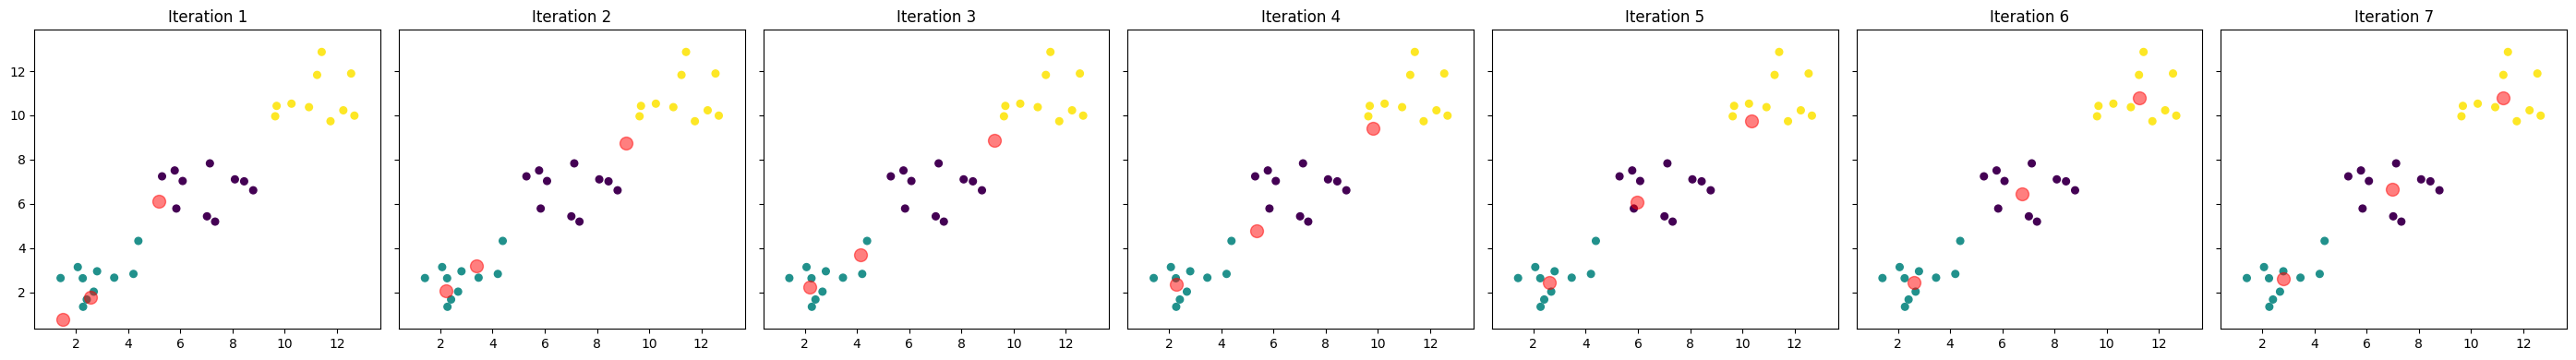

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file containing the generated circle points
df = pd.read_csv('random_circle_points.csv')

# Define the K-means clustering function using only NumPy for computation
def kmeans(X, n_clusters, rseed=2, max_iter=10):
    """Initializes centroids randomly by selecting n_clusters random points 
    from the dataset X. It also sets up a list to store the positions of centers 
    through each iteration for visualization purposes.
    """
    # Initialize the random state
    rng = np.random.RandomState(rseed)
    # Randomly select initial centroids from the dataset
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]    # To initialize the centroids with the existing points itself
    all_centers = [centers-0.9]  # List to store centers at each iteration and changing the points with 0.9 units
#     print(all_centers)

    
    """This loop iterates over the dataset to reassign points to the nearest 
    centroid and recalculates the centroids as the mean of points in each cluster. 
    The loop breaks early if centroids do not change, indicating convergence."""
    for _ in range(max_iter):
        # Calculate Euclidean distances from each point to each center
        distances = np.sqrt(((X[:, np.newaxis] - centers) ** 2).sum(axis=2))
        # Assign labels based on closest center
        labels = np.argmin(distances, axis=1)

        # Recalculate centers as the mean of points in each cluster
        new_centers = np.array([X[labels == j].mean(axis=0) for j in range(n_clusters)])

        # Break loop if centers do not change
        if np.all(centers == new_centers):
            break
        centers = new_centers
        all_centers.append(centers)  # Store new centers for visualization
        
    return centers, labels, all_centers


"""Defines a function to compute the clustering cost for different values of k. 
It needs the kmeans function to get cluster centers and labels, then 
calculates the sum of squared distances from each point to its assigned center."""
# Function to compute the clustering cost for a given number of clusters
def compute_cost(X, k):
    centers, labels, _ = kmeans(X, k)
    cost = 0
    for i in range(k):
        # Sum of squared distances of points to their nearest center
        cost += ((X[labels == i] - centers[i]) ** 2).sum()
    return cost


"""A function to visualize how centroids move over different iterations
of the K-means algorithm for a given number of clusters. 
It plots the centroids and points for each iteration, showing the clustering process."""
# Function to plot the centroid convergence through the iterations of K-means
def plot_kmeans_iterations(X, n_clusters):
    _, labels, all_centers = kmeans(X, n_clusters)
    iterations = len(all_centers)
    
    # Create a subplot for each iteration
    fig, axes = plt.subplots(1, iterations, figsize=(iterations * 4, 4), sharey=True)
    for i, ax in enumerate(axes):
        # Plot data points with cluster labels
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=30, cmap='viridis')
        # Plot centroids
        centers = all_centers[i]
        ax.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.5)
        ax.set_title(f'Iteration {i+1}')
        # Set consistent axis limits
        ax.set_xlim(df['X'].min()-1, df['X'].max()+1)
        ax.set_ylim(df['Y'].min()-1, df['Y'].max()+1)
    
    plt.tight_layout()
    plt.show()

    
"""Converts the DataFrame to a NumPy array and visualizes the centroid convergence 
for cluster sizes from 1 to 5."""
# Prepare data for clustering
X = df[['X', 'Y']].values

# Plot the progression of centroids for different values of K (from 1 to 5)
for k in range(3,4):
    print(f"Convergence of centroids for K = {k}")
    plot_kmeans_iterations(X, k)

